In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
house = pd.read_csv('/root/data/house_sales.csv')

In [3]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.model_selection import train_test_split

In [5]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [42]:
cluster = house[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition']]

In [43]:
from sklearn import preprocessing

In [44]:
cluster_s = cluster.copy()
cluster_s

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
0,3,1.00,1180,5650,1.0,0,0,3
1,3,2.25,2570,7242,2.0,0,0,3
2,2,1.00,770,10000,1.0,0,0,3
3,4,3.00,1960,5000,1.0,0,0,5
4,3,2.00,1680,8080,1.0,0,0,3
...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3
21609,4,2.50,2310,5813,2.0,0,0,3
21610,2,0.75,1020,1350,2.0,0,0,3
21611,3,2.50,1600,2388,2.0,0,0,3


In [9]:
cluster_s['bedrooms'] = preprocessing.scale(cluster_s['bedrooms'].astype('float32'))

/root/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [45]:
cluster_s['bedrooms'] = preprocessing.scale(cluster_s['bedrooms'].astype('float64'))
cluster_s['bedrooms']

0       -0.398737
1       -0.398737
2       -1.473959
3        0.676485
4       -0.398737
           ...   
21608   -0.398737
21609    0.676485
21610   -1.473959
21611   -0.398737
21612   -1.473959
Name: bedrooms, Length: 21613, dtype: float64

In [11]:
cluster_s['bathrooms'] = preprocessing.scale(cluster_s['bathrooms'].astype('float64'))

In [12]:
cluster_s['sqft_living'] = preprocessing.scale(cluster_s['sqft_living'].astype('float64'))

In [13]:
cluster_s['sqft_lot'] = preprocessing.scale(cluster_s['sqft_lot'].astype('float64'))

In [14]:
cluster_s['floors'] = preprocessing.scale(cluster_s['floors'].astype('float64'))

In [15]:
cluster_s['waterfront'] = preprocessing.scale(cluster_s['waterfront'].astype('float64'))

In [16]:
cluster_s['view'] = preprocessing.scale(cluster_s['view'].astype('float64'))

In [17]:
cluster_s['condition'] = preprocessing.scale(cluster_s['condition'].astype('float64'))

In [18]:
cluster_train, cluster_test = train_test_split(cluster_s, test_size=0.3, random_state=3232)

In [19]:
from scipy.spatial.distance import cdist

In [46]:
cluster = range(1,9)
cluster

range(1, 9)

In [21]:
mean_dist = []

In [22]:
print(cluster_train.shape)

(15129, 8)


In [23]:
cluster_test.shape

(6484, 8)

In [24]:
for k in cluster:
    model = KMeans(n_clusters=k) # \ means in a new line
    model.fit(cluster_train)
    mean_dist.append(sum(np.min(cdist(cluster_train,model.cluster_centers_,'euclidean'),\
                                axis=1))/cluster_train.shape[0])


Text(0, 0.5, 'Average Distance')

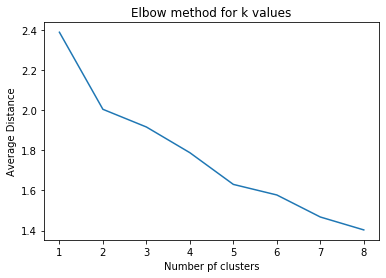

In [25]:
plt.plot(cluster,mean_dist)
plt.title("Elbow method for k values")
plt.xlabel('Number pf clusters')
plt.ylabel("Average Distance")

Text(0.5, 1.0, 'Elbow method for our k  value')

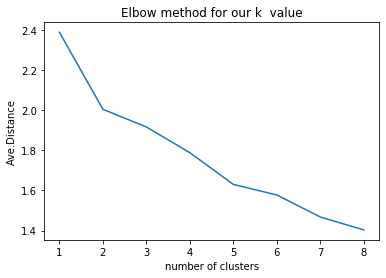

In [26]:
plt.plot(cluster,mean_dist)
plt.xlabel('number of clusters')
plt.ylabel('Ave.Distance')
plt.title('Elbow method for our k  value')


### Canonical Discriminate Analysis

In [27]:
from sklearn.decomposition import PCA

In [28]:
PCA_2 = PCA(2) 

In [29]:
# k=3, 3 cluster solution
model1 = KMeans(n_clusters=3)
model1.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
plot_columns = PCA_2.fit_transform(cluster_train)

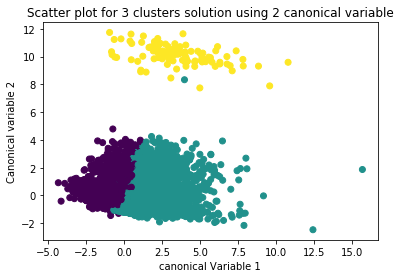

In [31]:
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model1.labels_,)
plt.xlabel('canonical Variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatter plot for 3 clusters solution using 2 canonical variable')
plt.show() 

In [32]:
model2= KMeans(n_clusters=2)

In [33]:
model2.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
model2 = KMeans(n_clusters=2)
model2.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
plot_columns = PCA_2.fit_transform(cluster_train)

Text(0.5, 1.0, 'Scatter plot for2 clusters using 2 canonical variable')

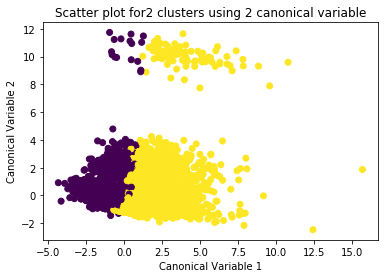

In [36]:
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model2.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatter plot for2 clusters using 2 canonical variable')

In [37]:
model5 = KMeans(n_clusters=5)
model5.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
PCA_5=PCA(5)

In [39]:
plot_columns = PCA_2.fit_transform(cluster_train)

Text(0.5, 1.0, 'Scatter plot for 5 clusters of 5 canonical variables')

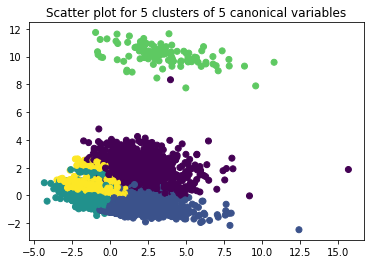

In [40]:
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1],c=model5.labels_,)
plt.title('Scatter plot for 5 clusters of 5 canonical variables')